In [1]:
import pysam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from Bio import SeqIO
import pandas as pd

In [32]:
global_homopolymers_ref = {(nucl, k) : 0 for nucl in ['A', 'G', 'C', 'T'] for k in range(3, 21)}
global_homopolymers_reads = {(nucl, k) : 0 for nucl in ['A', 'G', 'C', 'T'] for k in range(3, 100)}

SAM_FILE_ALN_1 = "aln_1.sam"
SAM_FILE_ALN_2 = "aln_2.sam"
BAM_FILE_ALN_1 = "aln_1.bam"
BAM_FILE_ALN_2 = "aln_sorted_2.bam"
REFERENCE_FILE = "DH10B-K12.fasta"

refseq = SeqIO.read(REFERENCE_FILE, 'fasta').seq

In [33]:
last_nucl, current_lenght = '', 0
for read in pysam.AlignmentFile(SAM_FILE_ALN_1, "rb").fetch():
    for nucl in read.seq:
        if current_lenght == 0:
            last_nucl = nucl

        if nucl == last_nucl:
            current_lenght += 1

        elif current_lenght > 3:
            global_homopolymers_reads[(last_nucl, current_lenght)] += 1
            current_lenght = 0

last_nucl, current_lenght = '', 0
for nucl in refseq:
    if current_lenght == 0:
        last_nucl = nucl

    if nucl == last_nucl:
        current_lenght += 1

    elif current_lenght > 3:
        global_homopolymers_ref[(last_nucl, current_lenght)] += 1
        current_lenght = 0

### Видно, что распределения почти совпадают (с точности до коэф. 33)

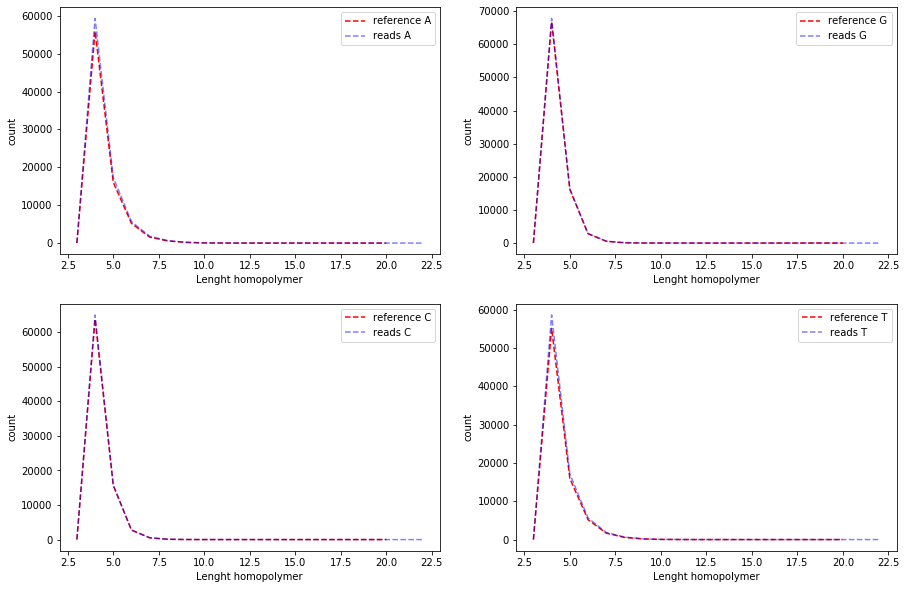

In [86]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for nucl, ax_grid in zip(['A', 'G', 'C', 'T'], [ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1]]):
    x_read, y_read = [], []
    x_ref, y_ref = [], []
    for key in global_homopolymers_ref:
        if key[0] == nucl:
            x_ref.append(key[1])
            y_ref.append(global_homopolymers_ref[key])
    for key in global_homopolymers_reads:
        if key[0] == nucl:
            x_read.append(key[1])
            y_read.append(global_homopolymers_reads[key] / 33)

    ax_grid.plot(x_ref, y_ref, label=f'reference {nucl}', c='r', linestyle='--')
    ax_grid.plot(x_read[:20], y_read[:20], label=f'reads {nucl}', c='b', linestyle='--', alpha=0.5)
    ax_grid.set(xlabel='Lenght homopolymer', ylabel='count')
    ax_grid.legend()

### То же самое, но без нормировки

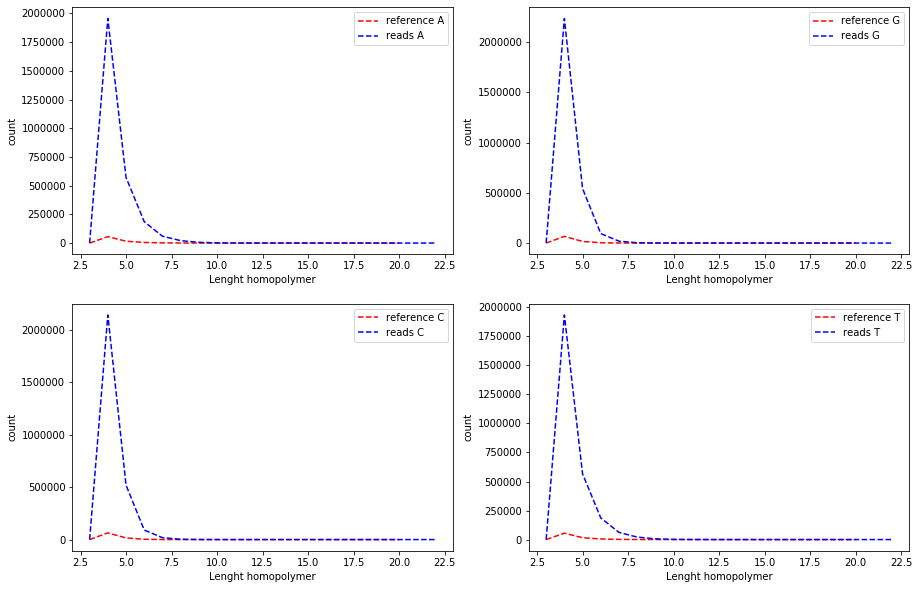

In [88]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for nucl, ax_grid in zip(['A', 'G', 'C', 'T'], [ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1]]):
    x_read, y_read = [], []
    x_ref, y_ref = [], []
    for key in global_homopolymers_ref:
        if key[0] == nucl:
            x_ref.append(key[1])
            y_ref.append(global_homopolymers_ref[key])
    for key in global_homopolymers_reads:
        if key[0] == nucl:
            x_read.append(key[1])
            y_read.append(global_homopolymers_reads[key])

    ax_grid.plot(x_ref, y_ref, label=f'reference {nucl}', c='r', linestyle='--')
    ax_grid.plot(x_read[:20], y_read[:20], label=f'reads {nucl}', c='b', linestyle='--')
    ax_grid.set(xlabel='Lenght homopolymer', ylabel='count')
    ax_grid.legend()